In [1]:
# here using the rgresstion problame 
import tensorflow as tf 
import numpy as np 
from matplotlib import pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

Generate Data 

In [2]:
x_train = np.linspace(-1,1,20)

In [3]:
x_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [4]:
x_test = np.linspace(-1,1,20)

In [5]:
x_test 

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [6]:
y_train = np.array([-0.6561,-0.3099,-0.59035,-0.50855,-0.285 , 
                    -0.2443,-0.02445,0.00135,-0.2006,0.07475,
                    -0.1422,0.06515,0.15265,0.3521,0.28415,
                    0.5524,0.23115,0.20835,0.4211,0.60485])

In [7]:
y_test = np.array([-0.69415,-0.451,-0.43005,-0.4484,-0.1475,
                   -0.5019,-0.28055,0.24595,-0.21425,-0.0286,
                    0.23415,0.46575,0.07955,0.1973,0.0719,
                    0.3639,0.5536,0.3365,0.50705,0.33435])

In [8]:
# Check lengths of x_test and y_test
print(len(x_test), len(y_test))


20 20


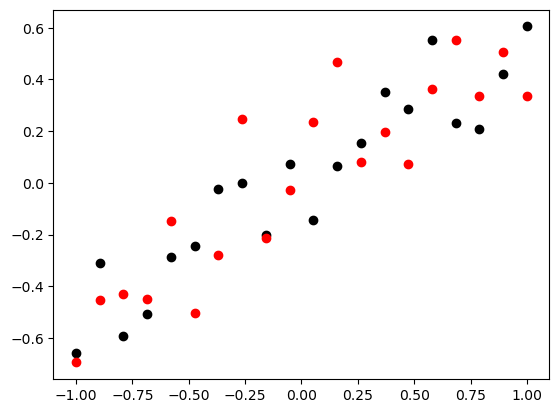

In [9]:
#  here we ploting the train and test data 
plt.scatter(x_train,y_train,color = 'black',label = 'Train')
plt.scatter(x_test,y_test,color = 'red',label = 'Test')
plt.show()

Regression Model 

In [10]:
model = Sequential ()

model.add(Dense(128,input_dim=1,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = "linear"))


adam = Adam(learning_rate=0.01)
model.compile(loss = 'mse',optimizer = adam, metrics = ['mse'])
history = model.fit(x_train,y_train,epochs = 500,validation_data=(x_test,y_test),verbose = False)

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The evaluate method in a machine learning model is used to assess the performance of the model on a given dataset.
It computes the loss and any additional metrics specified during the model compilation.

In [13]:
# evaluate the model 
_ , train_mse = model.evaluate(x_train,y_train,verbose=0)
_ ,test_mse = model.evaluate(x_test,y_test,verbose=0)
print('Train : {} , Test : {}' . format(train_mse,test_mse))
# here loss on the given data 

Train : 0.004583821166306734 , Test : 0.045474786311388016


In [15]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


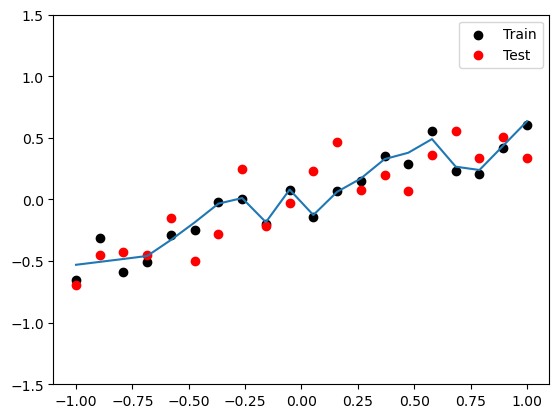

In [17]:
plt.figure()
plt.scatter(x_train,y_train,color = 'black',label = 'Train')
plt.scatter(x_test,y_test,color = 'red',label = 'Test')
plt.plot(x_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))     # here it show the overfitting in the given
plt.show()

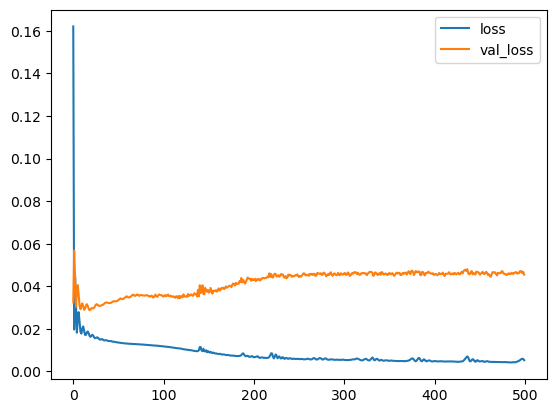

In [19]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

# now using Dropout Model

In [25]:
model = Sequential ()

model.add(Dense(128,input_dim=1,activation = 'relu'))
model.add(Dropout(0.5))# here we dorping the nodes in the h1
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))  # here we dorping the nodes in the h2
model.add(Dense(1,activation = "linear"))


adam = Adam(learning_rate=0.01)
model.compile(loss = 'mse',optimizer = adam, metrics = ['mse'])
history = model.fit(x_train,y_train,epochs = 500,validation_data=(x_test,y_test),verbose = False)

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# evaluate the model 
_ , train_mse = model.evaluate(x_train,y_train,verbose=0)
_ ,test_mse = model.evaluate(x_test,y_test,verbose=0)
print('Train : {} , Test : {}' . format(train_mse,test_mse))
# here loss on the given data 

Train : 0.015043139457702637 , Test : 0.032756321132183075


In [27]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


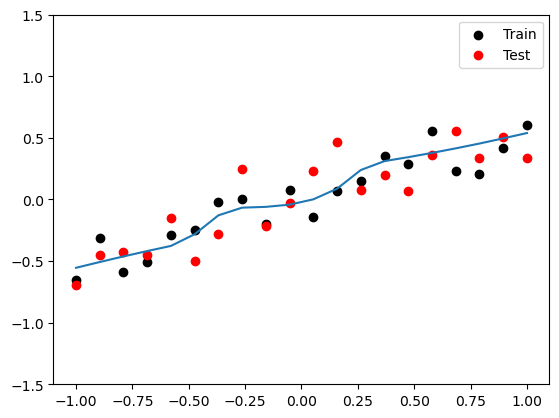

In [28]:
plt.figure()
plt.scatter(x_train,y_train,color = 'black',label = 'Train')
plt.scatter(x_test,y_test,color = 'red',label = 'Test')
plt.plot(x_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))     # here it show the overfitting in the given
plt.show()

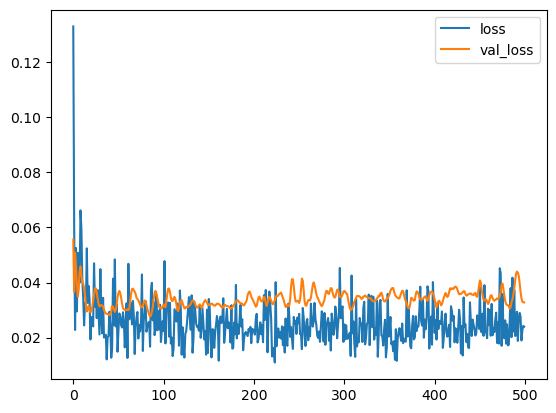

In [29]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()